### Accessing ```ADP.2024-01-04T15:02:12.615.fits``` from ```P112_data```

In [1]:
filepath = "../data/P112_data/ADP.2024-01-04T15:02:12.615.fits"

"../data/P112_data/ADP.2024-01-04T15:02:12.615.fits"

In [2]:
isfile(filepath)

true

In [3]:
#readdir(filepath);

In [4]:
#import Pkg; Pkg.add("FITSIO")

In [5]:
using FITSIO

In [6]:
hdul = FITS(filepath, "r")

File: ../data/P112_data/ADP.2024-01-04T15:02:12.615.fits
Mode: "r" (read-only)
HDUs: Num  Name      Type   
      1              Image  
      2    SPECTRUM  Table  

In [7]:
P112_PH = read_header(hdul[1])
P112_PH

SIMPLE  =                    T / file does conform to FITS standard
BITPIX  =                   16 / number of bits per data pixel
NAXIS   =                    0 / number of data axes
EXTEND  =                    T / FITS dataset may contain extensions
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronom
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
DATE    = '2024-01-04T10:23:42' / file creation date (YYYY-MM-DDThh:mm:ss UT)
ORIGIN  = 'ESO-PARANAL'        / European Southern Observatory
OBJECT  = 'UCAC4 202-005918'   / Original target.
RA      =            81.648512 / [deg] Spectroscopic target position (J2000)
DEC     =            -49.78567 / [deg] Spectroscopic target position (J2000)
EXPTIME =                300.0 / [s] Total integration time per pixel
MJD-OBS =       60284.01816387 / [d] Start of observations (days)
MJD-END =     60284.0216360922 / [d] End of observations (days)
TELESCOP= 'ESO-VLT-U2'         / ESO <TEL>

### TARGET: ```UCAC4 202-005918```

In [8]:
P112_object = P112_PH["OBJECT"]

println("Object Name: $P112_object")

Object Name: UCAC4 202-005918


In [9]:
# Gather the necessary data
wavelength = read(hdul[2], "WAVE") # Wavelength in vacuum (Å)
air_wavelength = read(hdul[2], "WAVE_AIR")
flux = read(hdul[2], "FLUX");
error = read(hdul[2], "ERR");

### TARGET'S Wavelength, Air Wavelength, and Flux Measurements

In [10]:
using Statistics

In [11]:
# Wavelength Measurements
println("Size:", size(wavelength))
println("Min:", minimum(wavelength))
println("Max:", maximum(wavelength))
println("Mean:", mean(wavelength))
println("Standard Deviation:", std(wavelength))

Size:(443262, 1)
Min:3772.0027440048325
Max:7899.979099406373
Mean:5583.976082865096
Standard Deviation:1186.2788955750204


In [12]:
# Air Wavelength Measurements
println("Size:", size(air_wavelength))
println("Min:", minimum(air_wavelength))
println("Max:", maximum(air_wavelength))
println("Mean:", mean(air_wavelength))
println("Standard Deviation:", std(air_wavelength))

Size:(443262, 1)
Min:3770.9314005522947
Max:7897.806458558487
Mean:5582.424503361965
Standard Deviation:1185.962224556927


In [13]:
# Flux Measurements
println("Size:", size(flux))
println("Min:", minimum(flux))
println("Max:", maximum(flux))
println("Mean:", mean(flux))
println("Standard Deviation:", std(flux))

Size:(443262, 1)
Min:-2.504302323906054e-12
Max:3.7456690368842945e-12
Mean:2.2096346282860583e-14
Standard Deviation:3.298712359849157e-14


In [14]:
# Error Measurements
println("Size:", size(error))
println("Min:", minimum(error))
println("Max:", maximum(error))
println("Mean:", mean(error))
println("Standard Deviation:", std(error))

Size:(443262, 1)
Min:0.0
Max:1.4746710288925036e-12
Mean:4.7845241827303524e-15
Standard Deviation:2.9989195061184765e-14


## TARGET'S Spectrum Analysis

In [15]:
using PyPlot

In [16]:
# Given vaccuum wavelength of lithium line
li_wavelength_air = 6707.926 # Å
li_wavelength_vac = 6709.773438 # Å

6709.773438

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


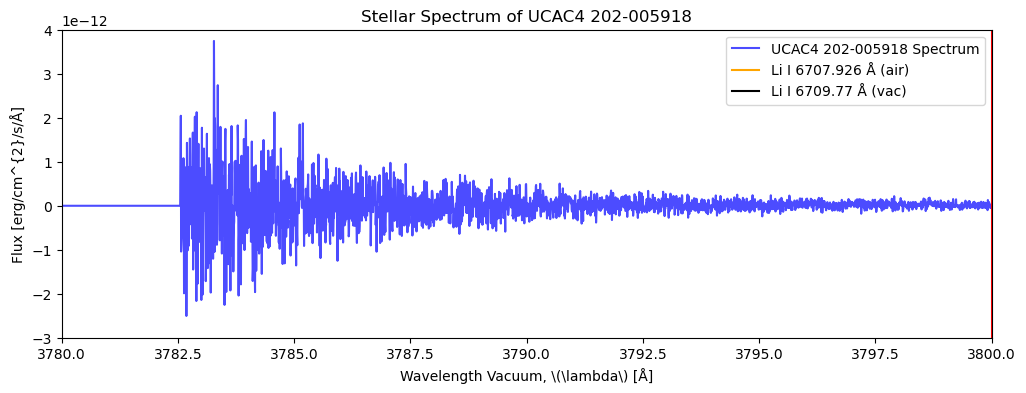

In [17]:
PyPlot.figure(figsize = (12, 4))
PyPlot.plot(wavelength, flux,
    color = "blue",
    label = "$P112_object Spectrum",
    alpha = 0.7)

PyPlot.axvline(li_wavelength_air,
    color = "orange",
    linestyle = "-",
    label = "Li I 6707.926 Å (air)")

PyPlot.axvline(li_wavelength_vac,
    color = "black",
    linestyle = "-",
    label = "Li I 6709.77 Å (vac)")

PyPlot.axvline(3800,
    color = "red",
    linestyle = "-")

# Optionally set the x-axis limits:
PyPlot.xlim(3780, 3800)
PyPlot.ylim(-3e-12, 4e-12)
PyPlot.xlabel("Wavelength Vacuum, \\(\\lambda\\) [Å]")
PyPlot.ylabel("Flux [erg/cm^{2}/s/Å]")
PyPlot.title("Stellar Spectrum of $P112_object")
PyPlot.legend()
#PyPlot.savefig("ADP.2024-01-04T15:02:12.615_rawstellarspectrum.png")
PyPlot.show();

### **Applying the Doppler shift correction**

**Purpose:** to remove the radial velocity effect and bring the synthesized spectrum back to the rest frame (orange virtual line) for proper spectral analysis.

In [18]:
c = 299792.458 # [k]
rv_value = P112_PH["ESO QC CCF RV"];

In [19]:
air_wavelength_shifted = air_wavelength / (1 + rv_value / c);
vac_wavelength_shifted = wavelength / (1 + rv_value / c);

### Plot Air Wavelength vs. Flux for TARGET's Spectrum

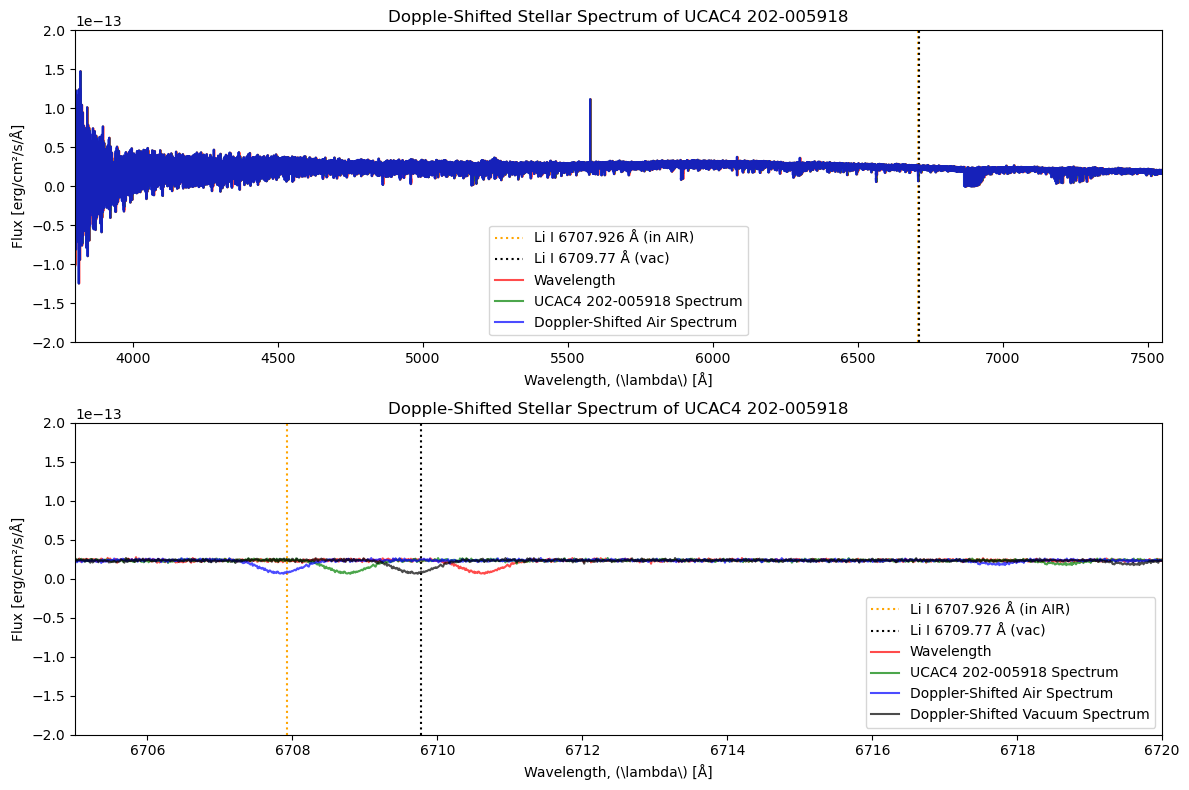

In [41]:
PyPlot.figure(figsize = (12, 8))

PyPlot.subplot(211)

PyPlot.axvline(li_wavelength_air,
    color = "orange",
    linestyle = "dotted",
    label = "Li I 6707.926 Å (in AIR)")

PyPlot.axvline(li_wavelength_vac,
    color = "black",
    linestyle = "dotted",
    label = "Li I 6709.77 Å (vac)")

PyPlot.plot(wavelength, flux,
    color = "red",
    label = "Wavelength",
    alpha = 0.7)

PyPlot.plot(air_wavelength, flux,
    color = "green",
    label = "$(P112_object) Spectrum",
    alpha = 0.7)
    
PyPlot.plot(air_wavelength_shifted, flux,
    color = "blue",
    label = "Doppler-Shifted Air Spectrum",
    alpha = 0.7)

#PyPlot.xlim(3400, 4000)
PyPlot.ylim(-2e-13, 2e-13)
PyPlot.xlim(3800, 7550)
#PyPlot.ylim(-3e-12, 4e-12)
PyPlot.xlabel("Wavelength, (\\lambda\\) [Å]")
PyPlot.ylabel("Flux [erg/cm²/s/Å]")
PyPlot.title("Dopple-Shifted Stellar Spectrum of $(P112_object)")
PyPlot.legend()


PyPlot.subplot(212)

PyPlot.axvline(li_wavelength_air,
    color = "orange",
    linestyle = "dotted",
    label = "Li I 6707.926 Å (in AIR)")

PyPlot.axvline(li_wavelength_vac,
    color = "black",
    linestyle = "dotted",
    label = "Li I 6709.77 Å (vac)")

PyPlot.plot(wavelength, flux,
    color = "red",
    label = "Wavelength",
    alpha = 0.7)

PyPlot.plot(air_wavelength, flux,
    color = "green",
    label = "$(P112_object) Spectrum",
    alpha = 0.7)
    
PyPlot.plot(air_wavelength_shifted, flux,
    color = "blue",
    label = "Doppler-Shifted Air Spectrum",
    alpha = 0.7)

PyPlot.plot(vac_wavelength_shifted, flux,
    color = "black",
    label = "Doppler-Shifted Vacuum Spectrum",
    alpha = 0.7)


PyPlot.xlim(6705, 6720)
PyPlot.ylim(-2e-13, 2e-13)
PyPlot.xlabel("Wavelength, (\\lambda\\) [Å]")
PyPlot.ylabel("Flux [erg/cm²/s/Å]")
PyPlot.title("Dopple-Shifted Stellar Spectrum of $(P112_object)")
PyPlot.legend()
PyPlot.tight_layout()

# PyPlot.savefig("ADP.2024-01-04T15:02:12.615_shiftedstellarspectrum.png")
PyPlot.show();

-----

### Fit the TARGET's Spectrum using KORG w/ GALAH DR3 linelist

In [21]:
#import Pkg; Pkg.add("DataFrames")

In [22]:
using Korg, CSV, DataFrames

In [23]:
galah_linelist = Korg.get_GALAH_DR3_linelist();

In [24]:
field_names = fieldnames(typeof(galah_linelist[2]))
println(field_names)

(:wl, :log_gf, :species, :E_lower, :gamma_rad, :gamma_stark, :vdW)


In [25]:
galah_linelist

307000-element Vector{Korg.Line{Float64, Float64, Float64, Float64, Float64, Float64}}:
 OTi 4676.310547 Å (log gf = -0.91, χ = 0.32 eV)
 OTi 4676.31543 Å (log gf = -1.17, χ = 0.3 eV)
 OTi 4676.316406 Å (log gf = -1.01, χ = 0.59 eV)
 HSi 4676.318848 Å (log gf = -3.21, χ = 1.49 eV)
 Rh I 4676.330566 Å (log gf = -1.78, χ = 0.71 eV)
 Ni I 4676.331055 Å (log gf = -3.36, χ = 3.46 eV)
 OTi 4676.334473 Å (log gf = -0.91, χ = 0.34 eV)
 OTi 4676.336426 Å (log gf = -1.24, χ = 0.26 eV)
 OZr 4676.339844 Å (log gf = 0.37, χ = 0.35 eV)
 OTi 4676.341797 Å (log gf = -0.13, χ = 1.19 eV)
 C2 4676.342773 Å (log gf = -2.43, χ = 0.65 eV)
 OTi 4676.347656 Å (log gf = -1.17, χ = 0.28 eV)
 OTi 4676.347656 Å (log gf = 0.31, χ = 0.47 eV)
 ⋮
 OTi 7927.090332 Å (log gf = -0.32, χ = 0.83 eV)
 OTi 7927.096191 Å (log gf = -0.01, χ = 0.87 eV)
 HFe 7927.102051 Å (log gf = -1.4, χ = 0.3 eV)
 OTi 7927.113281 Å (log gf = -1.34, χ = 0.65 eV)
 OTi 7927.121094 Å (log gf = 0.09, χ = 0.73 eV)
 OTi 7927.128906 Å (log gf = -0.8

In [26]:
linetable = DataFrame(galah_linelist)


Row,wl,log_gf,species,E_lower,gamma_rad,gamma_stark,vdW
,Float64,Float64,Species,Float64,Float64,Float64,Tuple…
1,4.67631e-5,-0.909427,OTi,0.32,2.1e7,0.0,"(0.0, -1.0)"
2,4.67632e-5,-1.16767,OTi,0.303,2.1e7,0.0,"(0.0, -1.0)"
3,4.67632e-5,-1.0128,OTi,0.594,1.9e7,0.0,"(0.0, -1.0)"
4,4.67632e-5,-3.207,HSi,1.494,1.8938e5,0.0,"(0.0, -1.0)"
5,4.67633e-5,-1.78,Rh I,0.706,5.06211e6,2.48314e-6,"(1.46525e-8, -1.0)"
6,4.67633e-5,-3.355,Ni I,3.465,9.12011e7,2.88403e-5,"(3.16228e-8, -1.0)"
7,4.67633e-5,-0.907546,OTi,0.335,2.1e7,0.0,"(0.0, -1.0)"
8,4.67634e-5,-1.23643,OTi,0.265,2.1e7,0.0,"(0.0, -1.0)"
9,4.67634e-5,0.37005,OZr,0.351,7.15121e8,0.0,"(0.0, -1.0)"


In [27]:
# linelist is in vacuum
linelist = Korg.Line.(Korg.air_to_vacuum.(linetable.wl),
                      linetable.log_gf,
                      linetable.species,
                      linetable.E_lower,
                      linetable.gamma_rad, 
                      linetable.gamma_stark, 
                      linetable.vdW)

307000-element Vector{Korg.Line{Float64, Float64, Float64, Float64, Float64, Float64}}:
 OTi 4677.61953 Å (log gf = -0.91, χ = 0.32 eV)
 OTi 4677.624414 Å (log gf = -1.17, χ = 0.3 eV)
 OTi 4677.625391 Å (log gf = -1.01, χ = 0.59 eV)
 HSi 4677.627833 Å (log gf = -3.21, χ = 1.49 eV)
 Rh I 4677.639555 Å (log gf = -1.78, χ = 0.71 eV)
 Ni I 4677.640043 Å (log gf = -3.36, χ = 3.46 eV)
 OTi 4677.643462 Å (log gf = -0.91, χ = 0.34 eV)
 OTi 4677.645416 Å (log gf = -1.24, χ = 0.26 eV)
 OZr 4677.648835 Å (log gf = 0.37, χ = 0.35 eV)
 OTi 4677.650788 Å (log gf = -0.13, χ = 1.19 eV)
 C2 4677.651765 Å (log gf = -2.43, χ = 0.65 eV)
 OTi 4677.656649 Å (log gf = -1.17, χ = 0.28 eV)
 OTi 4677.656649 Å (log gf = 0.31, χ = 0.47 eV)
 ⋮
 OTi 7929.271028 Å (log gf = -0.32, χ = 0.83 eV)
 OTi 7929.276889 Å (log gf = -0.01, χ = 0.87 eV)
 HFe 7929.28275 Å (log gf = -1.4, χ = 0.3 eV)
 OTi 7929.293983 Å (log gf = -1.34, χ = 0.65 eV)
 OTi 7929.301798 Å (log gf = 0.09, χ = 0.73 eV)
 OTi 7929.309612 Å (log gf = -0.82

### Extracting Copper (Cu) Lines from the GALAH DR3 linelist

In [28]:
# Filter rows where "species" contains "Cu" (case-insensitive)
element_Cu = filter(line -> occursin(r"(?i)Cu", string(line.species)), galah_linelist)

# check that Li lines are in vacuum:
element_Li = filter(line -> occursin(r"(?i)Li", string(line.species)), galah_linelist)



4-element Vector{Korg.Line{Float64, Float64, Float64, Float64, Float64, Float64}}:
 Li I 6709.615234 Å (log gf = -0.04, χ = 0.0 eV)
 Li I 6709.766602 Å (log gf = -0.34, χ = 0.0 eV)
 Li I 6709.773438 Å (log gf = -1.12, χ = 0.0 eV)
 Li I 6709.924316 Å (log gf = -1.42, χ = 0.0 eV)

In [38]:
# check that the Li line converted back to air wavelength would give 6707.926 
AIR1 = 6709.615234 / (1.0 + 2.735182E-4 + 131.4182 / 6709.615234^2 + 2.76249E8 / 6709.615234^4)
AIR2 = 6709.766602 / (1.0 + 2.735182E-4 + 131.4182 / 6709.766602^2 + 2.76249E8 / 6709.766602^4)
AIR3 = 6709.773438 / (1.0 + 2.735182E-4 + 131.4182 / 6709.773438^2 + 2.76249E8 / 6709.773438^4)
AIR4 = 6709.924316 / (1.0 + 2.735182E-4 + 131.4182 / 6709.924316^2 + 2.76249E8 / 6709.924316^4)
println(li_wavelength_air)
println(AIR1)
println(AIR2)
println(AIR3)
println(AIR4)

6707.926
6707.760044116456
6707.911371229346
6707.918205382826
6708.069042628047


In [30]:
df_Cu = DataFrame(element_Cu)
#println(df_Cu)

Row,wl,log_gf,species,E_lower,gamma_rad,gamma_stark,vdW
,Float64,Float64,Species,Float64,Float64,Float64,Tuple…
1,4.69878e-5,-0.658,Cu I,5.245,1.31826e8,3.38844e-6,"(2.57039e-8, -1.0)"
2,4.70292e-5,-1.247,Cu I,5.688,1.8197e8,3.63078e-6,"(2.69153e-8, -1.0)"
3,4.70591e-5,-0.529,Cu I,5.102,1.34896e8,3.38844e-6,"(2.57039e-8, -1.0)"
4,4.76875e-5,-0.33,Cu I,5.725,2.23872e8,3.63078e-6,"(2.69153e-8, -1.0)"
5,4.77746e-5,-1.597,Cu I,5.421,6.0256e7,3.38844e-6,"(2.81838e-8, -1.0)"
6,4.79179e-5,-1.697,Cu I,7.206,8.70963e8,5.12861e-5,"(5.12861e-8, -1.0)"
7,4.79528e-5,-0.382,Cu I,5.506,1.12202e8,3.38844e-6,"(2.63027e-8, -1.0)"
8,4.79837e-5,-1.803,Cu I,5.153,1.34896e8,3.38844e-6,"(2.57039e-8, -1.0)"
9,4.8412e-5,-2.364,Cu I,6.792,4.67735e8,3.89045e-5,"(4.67735e-8, -1.0)"


In [31]:
df_selected = select(df_Cu, [:species, :wl])

Row,species,wl
,Species,Float64
1,Cu I,4.69878e-5
2,Cu I,4.70292e-5
3,Cu I,4.70591e-5
4,Cu I,4.76875e-5
5,Cu I,4.77746e-5
6,Cu I,4.79179e-5
7,Cu I,4.79528e-5
8,Cu I,4.79837e-5
9,Cu I,4.8412e-5


----

### Fit Spectrum

In [33]:
#waveobs = select(df_Cu, [:wl])

mask = findall(x -> 3800 < x < 7550, air_wavelength_shifted)

waveobs = air_wavelength_shifted[mask];
fluxobs = flux[mask];
errobs  = read(hdul[2], "ERR")[mask];
println(size(waveobs))

(411652,)


In [34]:
# parse the observed spectrum
spec = (
    air_wavelength = waveobs, 
    flux = fluxobs, 
    waveobs = Korg.air_to_vacuum.(waveobs), 
    errobs = errobs  
);

### Programming Note: 
If you do not know the resolution, you will need to either determine it from your instrument specifications or provide the required alternatives

#### Notes:
- Input our own resolution, check the header
- mH is the same as Fe/H

In [35]:
initial_guess = (;Teff=4997.53, logg=2.40, m_H=-0.698843, vmic=1.15)

@time fit_result = Korg.Fit.fit_spectrum(vec(spec.waveobs), vec(spec.flux), vec(spec.errobs), linelist, initial_guess;  R=140000);



Constructing cool dwarf atmosphere interpolator.  This will only happen once per process...
3742.291431 seconds (4.59 G allocations: 1.226 TiB, 3.54% gc time, 3.56% compilation time: <1% of which was recompilation)


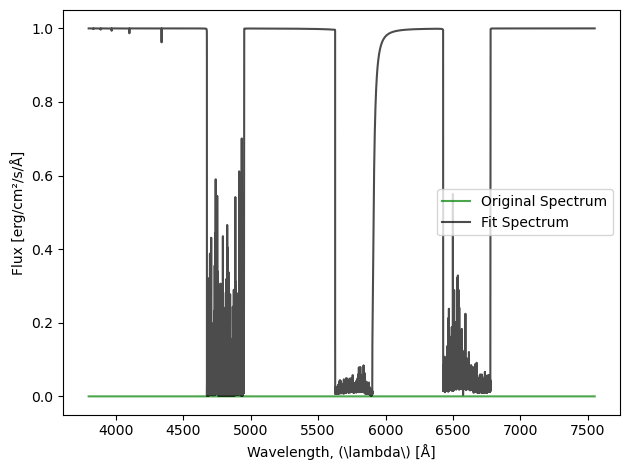

In [49]:
PyPlot.plot(waveobs, fluxobs, color = "green", label = "Original Spectrum", alpha = 0.7);
PyPlot.plot(waveobs, fit_result.best_fit_flux, color = "k", label = "Fit Spectrum", alpha = 0.7)
PyPlot.xlabel("Wavelength, (\\lambda\\) [Å]")
PyPlot.ylabel("Flux [erg/cm²/s/Å]")
PyPlot.legend()
PyPlot.tight_layout()

In [39]:
fit_result.best_fit_params

Dict{String, Float64} with 4 entries:
  "Teff" => 3111.15
  "logg" => 3.5
  "m_H"  => 0.609763
  "vmic" => 0.983019

In [44]:
fit_result.best_fit_flux

411652-element Vector{Float64}:
 0.9998969371130246
 0.9998970501801142
 0.9998971618058944
 0.9998972724431415
 0.9998973818003534
 0.9998974899785434
 0.999897597098086
 0.999897702974391
 0.9998978077598575
 0.9998979115515775
 0.9998980141292553
 0.9998981159678224
 0.999898216852885
 ⋮
 0.9999281165843137
 0.9999281177844099
 0.9999281189838305
 0.9999281201832689
 0.9999281213832791
 0.9999281225833342
 0.9999281237827693
 0.9999281249822528
 0.9999281261823717
 0.9999281273824423
 0.999928128581795
 0.9999281297810056

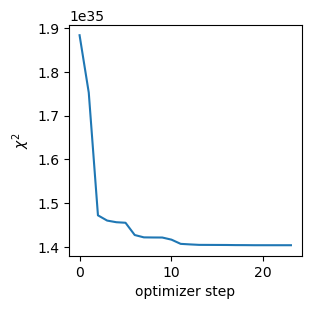

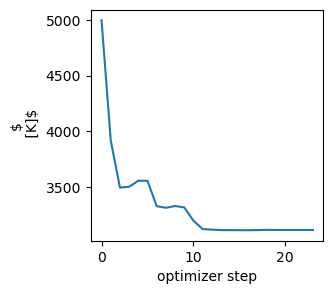

PyObject Text(0.5, 23.999999999999993, 'optimizer step')

In [37]:

figure(figsize=(3,3))
plot([t["chi2"] for t in fit_result.trace])
ylabel(L"χ^2")
xlabel("optimizer step")

figure(figsize=(3,3))
plot([t["Teff"] for t in fit_result.trace])
ylabel(L"
 [K]")
xlabel("optimizer step")

### Extracting Copper (Cu) Lines from ```Object Name: UCAC4 202-005918``` Spectrum from the Abudance Fitting KORG Notebook